# Data Manipulation with pandas

## Transforming DataFrames

In [2]:
import pandas as pd

In [27]:
home_df = pd.read_csv(r'.\datasets\homelessness.csv', index_col=0)
print(home_df.shape)

(51, 5)


In [28]:
print(home_df.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


In [29]:
home_df.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [30]:
home_df[['region', 'state']].head()

,region,state
0,East South Central,Alabama
1,Pacific,Alaska
2,Mountain,Arizona
3,West South Central,Arkansas
4,Pacific,California


In [31]:
# Sort home_df by individuals
print(home_df.sort_values(by='individuals', ascending=True).head())
print()
# Sort home_df by region, then descending family members
print(home_df.sort_values(by=['region', 'family_members'], ascending=[True, False]).head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


In [32]:
# New Columns
# Create indiv_per_10k col as homeless individuals per 10k state pop
home_df["indiv_per_10k"] = 10000 * home_df['individuals'] / home_df['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_home_df = home_df[home_df['indiv_per_10k']>20]

# Sort high_home_df by descending indiv_per_10k
high_home_df_srt = high_home_df.sort_values(by='indiv_per_10k', ascending=False)

# From high_home_df_srt, select the state and indiv_per_10k cols
result = high_home_df_srt[['state', 'indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## Aggregating DataFrames

### Summary statistics

In [16]:
import pandas as pd
sales = pd.read_csv(r'./datasets/sales_subset.csv', index_col=0)
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [17]:
sales.sort_values(by='date').head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350
1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324
6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350
6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350


In [18]:
sales['weekly_sales'].cumsum().head()

0     24924.50
1     46752.40
2    104010.83
3    121424.77
4    138982.86
Name: weekly_sales, dtype: float64

In [19]:
sales['date'].min()

'2010-02-05'

In [20]:
sales['date'].max()

'2012-10-26'

In [21]:
sales['weekly_sales'].sum()

256894718.89999998

In [22]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')


In [23]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

type
A    11
B     1
Name: count, dtype: int64
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64
department
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
department
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


In [24]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type']=='B']['weekly_sales'].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type']=='C']['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [26]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sales_all
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [27]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [36]:
# Import numpy with the alias np
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
agg_lst = [np.min, np.max, np.mean, np.median]
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg(agg_lst)

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


In [37]:
sales.pivot_table(values='weekly_sales', index='type')

,weekly_sales
type,
A,23674.667242
B,25696.678370


In [39]:
sales.pivot_table(values='weekly_sales', index='type', aggfunc=agg_lst)

,min,max,mean,median
,weekly_sales,weekly_sales,weekly_sales,weekly_sales
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [44]:
sales.pivot_table(values='weekly_sales', index='department', columns='type', aggfunc=agg_lst, fill_value='', margins=True)

min                             max                        \
type               A          B       All          A          B        All   
department                                                                   
1            9446.29   26041.71   9446.29  149743.97  131853.01  149743.97   
2           42431.88  104127.28  42431.88   93677.66  123952.48  123952.48   
3             6150.2   20011.47    6150.2   69512.63   89316.82   89316.82   
4           28762.65   44664.92  28762.65   66912.92   55495.92   66912.92   
5           11665.55   38887.81  11665.55  103531.25   89737.04  103531.25   
...              ...        ...       ...        ...        ...        ...   
96            -19.02    8348.61    -19.02   45278.54    10576.0   45278.54   
97          16599.27    5064.61   5064.61   45017.96    6720.96   45017.96   
98           5536.28      -2.25     -2.25   24273.74     1075.3   24273.74   
99            -147.0               -147.0     5350.0                5350.0   
All          -1098.0     -798.0   -1098.0  293966.05  232558.51  293966.05   

                    mean                                  median              \
type                   A              B           All          A           B   
department                                                                     
1           30961.725379   44050.626667  32052.467153   24743.07    31986.36   
2           67600.158788  112958.526667  71380.022778   68614.77  112812.985   
3           17160.002955      30580.655  18278.390625  13396.805   23145.625   
4           44285.399091   51219.654167  44863.253681   42639.47    51485.93   
5           34821.011364      63236.875       37189.0  30299.045    60400.66   
...                  ...            ...           ...        ...         ...   
96          21367.042857    9528.538333  20337.607681  25187.875     9503.14   
97           28471.26697    5828.873333  26584.400833   27016.58    5856.705   
98          12875.423182     217.428333  11820.590278  12636.275        34.1   
99            379.123659                   379.123659      167.0               
All         23674.667242    25696.67837  23843.950149   11943.92    13336.08   

                       
type              All  
department             
1           25478.905  
2            70001.02  
3             13788.1  
4           44011.535  
5           30943.785  
...               ...  
96          23935.495  
97          26354.365  
98           11943.84  
99              167.0  
All         12049.065  

[81 rows x 12 columns]

## Slicing and Indexing DataFrames

In [45]:
import pandas as pd

In [47]:
temperatures = pd.read_csv(r'./datasets/temperatures.csv', index_col=0)
temperatures.head(3)

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061


In [49]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')
print(temperatures_ind.head())
print()
# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())
print()
# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.547

          city        date        country  avg_temp_c
0      Abidjan  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...            ...         ...
16495     Xian  2013-05-01          China      18.979
16496     Xian  2013-06-01          China      23.522
16497     Xian  2013-07-01          China      25.251
16498     Xian  2013-08-01          China      24.528
16499     Xian  2013-09-01          China         NaN

[16500 rows x 4 colum

In [51]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin( cities)])
print()
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]

                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow   

In [52]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


In [53]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=['city']))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country', 'city'], ascending=[True, False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

In [54]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia', 'Moscow')])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]
                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                     

In [55]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India', 'Hyderabad'): ('Iraq', 'Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'date':'avg_temp_c' ])

# Subset in both directions at once
print(temperatures_srt.loc[
    ('India', 'Hyderabad'): ('Iraq', 'Baghdad')
    , 'date':'avg_temp_c'
])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020

In [58]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[
    (temperatures['date'] >= '2010-01-01') &
    (temperatures['date'] <= '2011-12-31')
]
print(temperatures_bool)
print()
# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])
print()
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-02'])

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
... 

In [59]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:5])

# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:5])

Abidjan
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


In [61]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16500 non-null  object 
 1   city        16500 non-null  object 
 2   country     16500 non-null  object 
 3   avg_temp_c  16407 non-null  float64
dtypes: float64(1), object(3)
memory usage: 644.5+ KB


In [63]:
temperatures['date'] = pd.to_datetime(temperatures['date'])
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16500 non-null  datetime64[ns]
 1   city        16500 non-null  object        
 2   country     16500 non-null  object        
 3   avg_temp_c  16407 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 644.5+ KB


In [65]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(
    values='avg_temp_c'
    , index=['country', 'city']
    , columns='year'
)

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

In [66]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi'), 2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

In [67]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis='index')

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==max(mean_temp_by_year)])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==min(mean_temp_by_city)])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


## Visualizing your data

In [68]:
import matplotlib.pyplot as plt

In [69]:
avocados = pd.read_pickle(r'./datasets/avoplotto.pkl')
print(avocados.shape)
avocados.head()

(1014, 6)


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


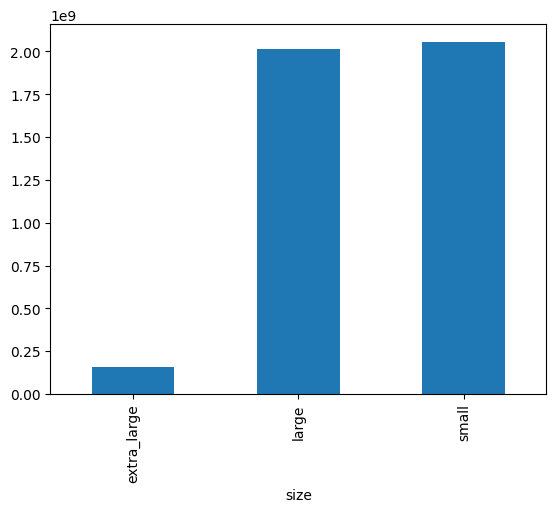

In [70]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

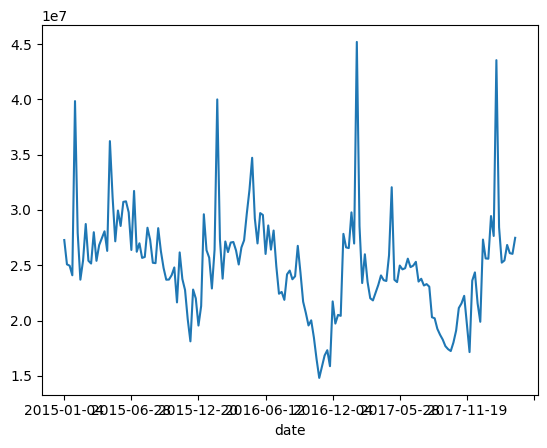

In [71]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

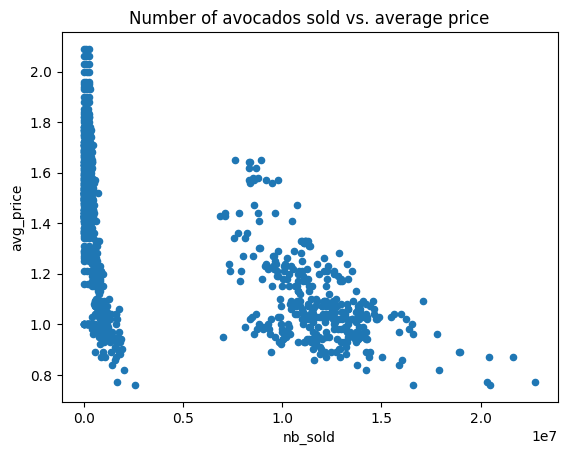

In [72]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(
    kind='scatter'
    , x='nb_sold'
    , y='avg_price'
    , title='Number of avocados sold vs. average price'
)

# Show the plot
plt.show()

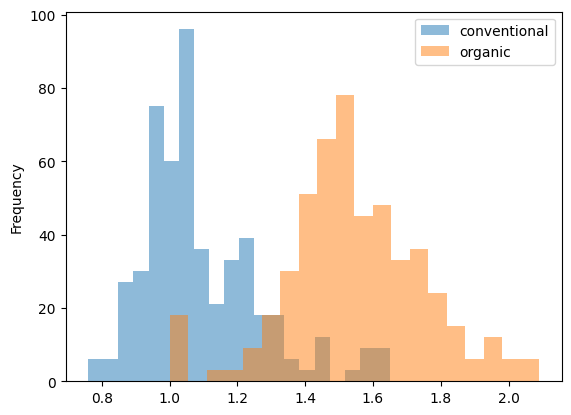

In [77]:
# Histogram of conventional avg_price 
avocados[avocados['type']=='conventional']['avg_price'].plot(kind='hist', alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].plot(kind='hist', alpha=0.5, bins=20)

# Add a legend
plt.legend(['conventional', 'organic'])

# Show the plot
plt.show()

In [97]:
avocados_2016 = avocados[avocados['year']==2016]
print(avocados_2016.shape)
avocados_2016.head()

(312, 6)


,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [92]:
list(avocados_2016['size'].unique())

['small', 'large', 'extra_large']

In [102]:
test_dict = {}
for size in list(avocados_2016['size'].unique()):
    test_dict[f'{size}_sold'] = [row['nb_sold'] if row['size'] == size else None for idx, row in avocados_2016.iterrows()]
    # avocados_2016[f'{size}_sold'] = [row['nb_sold'] if row['size'] == size else None for idx, row in avocados_2016.iterrows()]
    # avocados_2016['small_sold'] = [row['nb_sold'] if row['size'] == size else None for idx, row in avocados_2016.iterrows()]
    # avocados_2016['small_sold'] = [row['nb_sold'] if row['size'] == size else None for idx, row in avocados_2016.iterrows()]

In [103]:
test_dict.keys()

dict_keys(['small_sold', 'large_sold', 'extra_large_sold'])

In [108]:
import pprint as pp
pp.pprint(test_dict['extra_large_sold'])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [112]:
pp.pprint(avocados_2016)

           date          type  year  avg_price         size      nb_sold  \
52   2016-12-25  conventional  2016       1.00        small   9255125.20   
53   2016-12-18  conventional  2016       0.96        small   9394065.91   
54   2016-12-11  conventional  2016       0.98        small   9009996.11   
55   2016-12-04  conventional  2016       1.00        small  11043350.90   
56   2016-11-27  conventional  2016       1.21        small   7891487.94   
..          ...           ...   ...        ...          ...          ...   
944  2016-01-31       organic  2016       1.43  extra_large      5515.91   
945  2016-01-24       organic  2016       1.41  extra_large     12933.97   
946  2016-01-17       organic  2016       1.44  extra_large     13106.29   
947  2016-01-10       organic  2016       1.35  extra_large      8771.79   
948  2016-01-03       organic  2016       1.43  extra_large      7749.40   

      small_sold  large_sold  extra_large_sold  
52    9255125.20         NaN          

In [115]:
avocados.to_csv(r'./datasets/avocados.csv')
avocados_2016.to_csv(r'./datasets/avocados_2016.csv')

In [109]:
avocados_2016.isna().sum()

date                  0
type                  0
year                  0
avg_price             0
size                  0
nb_sold               0
small_sold          208
large_sold          208
extra_large_sold    208
dtype: int64

      date   type   year  avg_price   size  nb_sold  small_sold  large_sold  \
52   False  False  False      False  False    False       False        True   
53   False  False  False      False  False    False       False        True   
54   False  False  False      False  False    False       False        True   
55   False  False  False      False  False    False       False        True   
56   False  False  False      False  False    False       False        True   
..     ...    ...    ...        ...    ...      ...         ...         ...   
944  False  False  False      False  False    False        True        True   
945  False  False  False      False  False    False        True        True   
946  False  False  False      False  False    False        True        True   
947  False  False  False      False  False    False        True        True   
948  False  False  False      False  False    False        True        True   

     extra_large_sold  
52               True  
53 

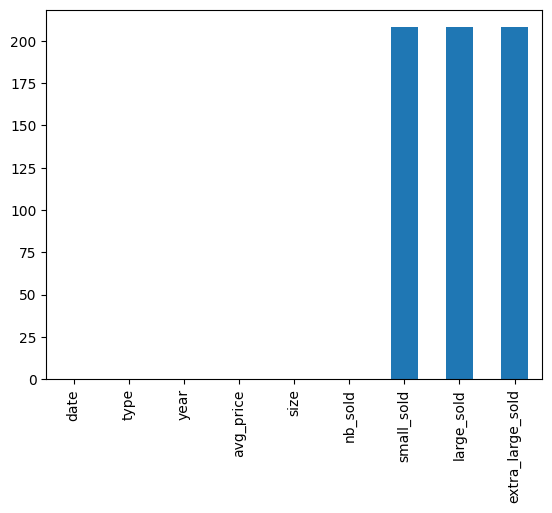

In [113]:
# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

In [116]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832,'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154,'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [117]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17', '2019-12-01'],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
